In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets , layers, models


#Getting Tensorflow version
print(tf.__version__)


2.12.0


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixels values to between 0 and 1
train_images , test_images =  train_images /255.0 , test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


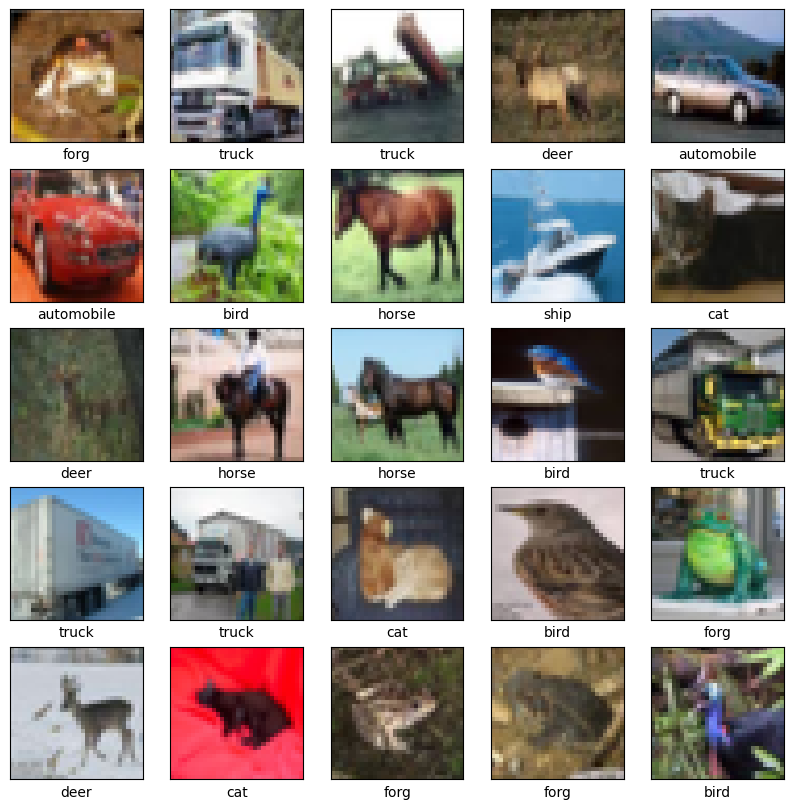

In [4]:
class_names = ['airplane','automobile','bird','cat', 'deer','dog',
               'forg','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [5]:
model =  models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation ='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))


In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 53ms/step - loss: 1.5330 - accuracy: 0.4420 - val_loss: 1.2456 - val_accuracy: 0.5497
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1675 - accuracy: 0.5845 - val_loss: 1.1160 - val_accuracy: 0.6027
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0402 - accuracy: 0.6320 - val_loss: 0.9886 - val_accuracy: 0.6511
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9505 - accuracy: 0.6651 - val_loss: 0.9676 - val_accuracy: 0.6599
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8780 - accuracy: 0.6918 - val_loss: 0.9906 - val_accuracy: 0.6620
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8262 - accuracy: 0.7102 - val_loss: 0.9070 - val_accuracy: 0.6847
Epoch 7/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7808 - accuracy: 0.7267 - val_loss: 0.9045 -

313/313 - 5s - loss: 0.9057 - accuracy: 0.6978 - 5s/epoch - 16ms/step


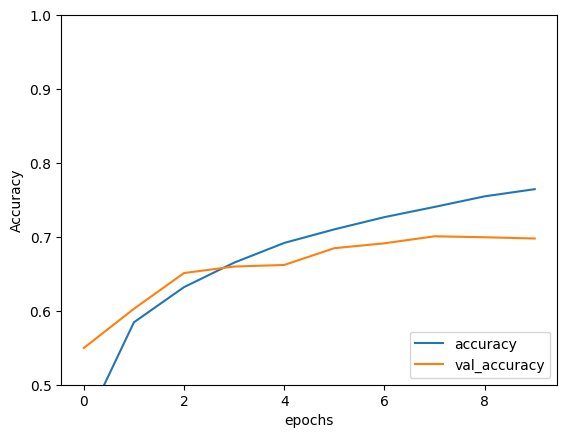

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss , test_acc =  model.evaluate(test_images, test_labels, verbose=2)